In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=42)

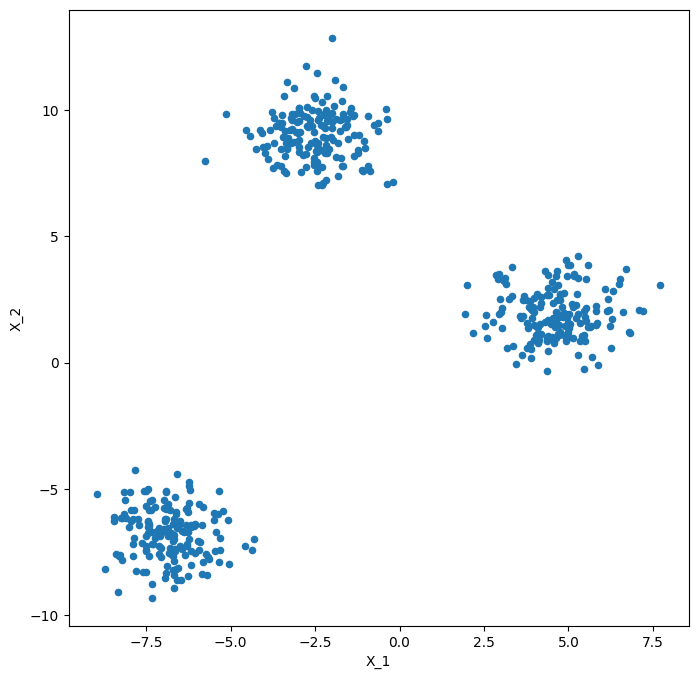

In [4]:
df = pd.DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1]))
fig, ax = plt.subplots(figsize=(8, 8))
df.plot(kind='scatter', x='x', y='y', ax=ax)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [5]:
def init_centroids(X, k):
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(X[:, 0]), max(X[:, 0]))
    cx2 = np.random.uniform(min(X[:, 1]), max(X[:, 1]))
    arr.append([cx1, cx2])
  return np.array(arr)

In [6]:
def dist(a, b):
  return np.sqrt(sum((a - b)**2))

In [7]:
def assign_cluster(k, X, centroids):
  clusters = [-1] * len(X)
  for i in range(len(X)):
    dist_arr = []
    for j in range(k):
      dist_arr.append(dist(X[i], centroids[j]))
    clusters[i] = dist_arr.index(min(dist_arr))
  return np.array(clusters)

In [8]:
def compute_centroids(k, X, clusters):
  cg_arr = []
  for i in range(k):
    arr = []
    for j in range(len(X)):
      if clusters[j] == i:
        arr.append(X[j])
    cg_arr.append(np.mean(arr, axis = 0))
  return np.array(cg_arr)

In [9]:
def measure_change(cg_prev, cg_new):
  res = 0
  for a,b in zip(cg_prev, cg_new):
    res += dist(a, b)
  return res

In [10]:
def show_clusters(X, clusters, cg):
  df = pd.DataFrame(dict(x = X[:, 0], y = X[:, 1], label = clusters))
  colors = {0: 'red', 1: 'blue', 2: 'green'}
  fig, ax = plt.subplots(figsize = (8, 8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  ax.scatter(cg[:, 0], cg[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'black')
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.show()

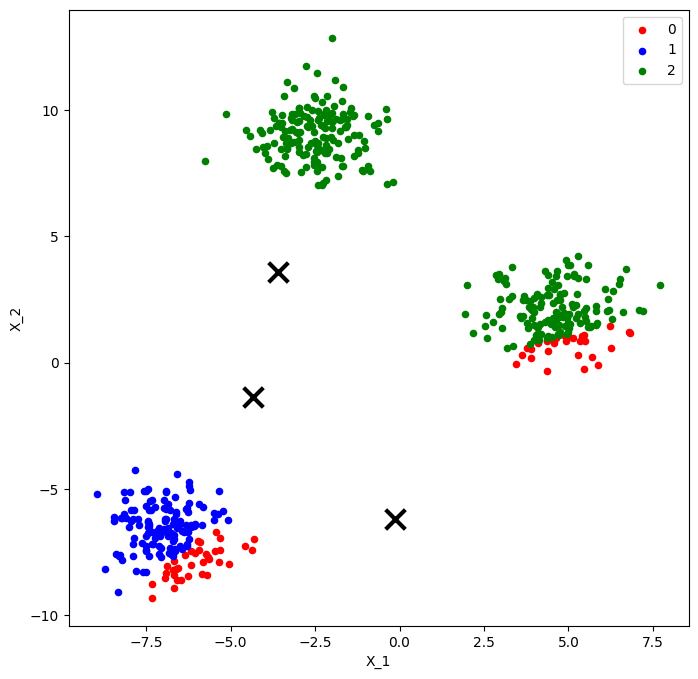

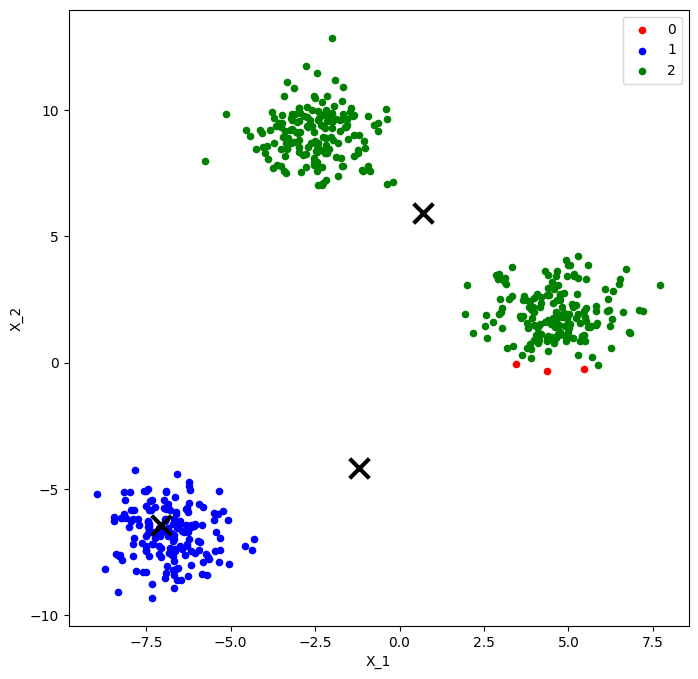

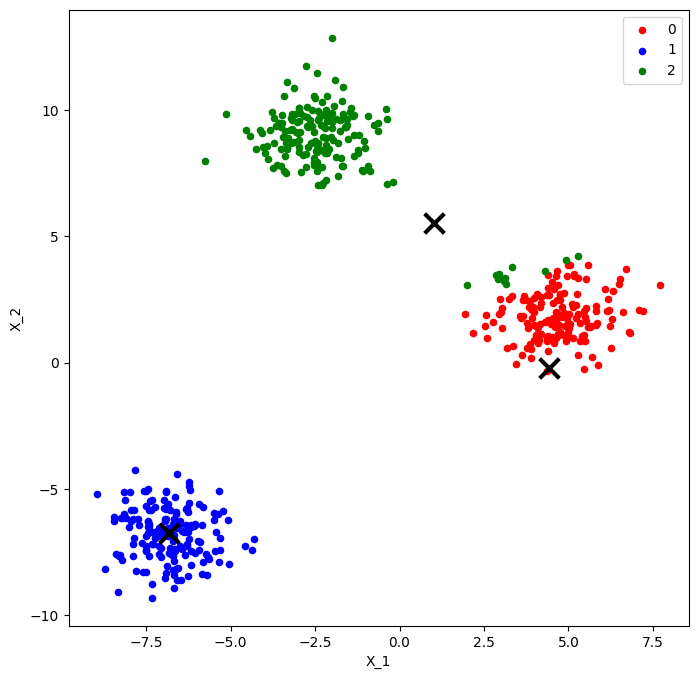

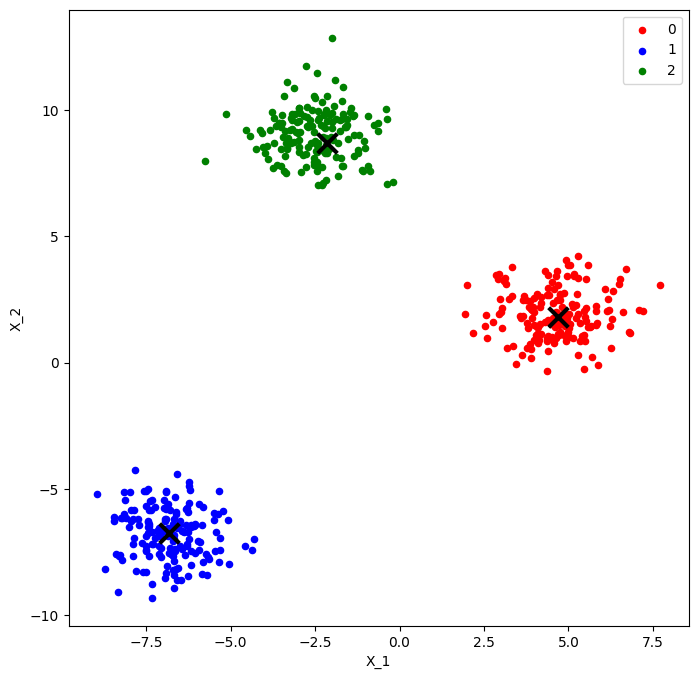

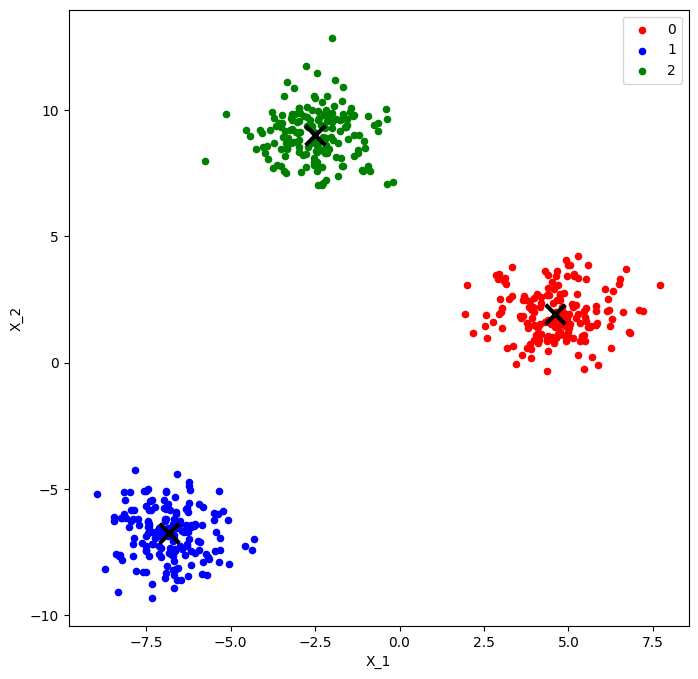

In [11]:
def k_means(k, X):
  cg_prev = init_centroids(X, k)
  clusters = [0] * len(X)
  cg_change = 100
  while cg_change > 0.01:
    clusters = assign_cluster(k, X, cg_prev)
    show_clusters(X, clusters, cg_prev)
    cg_new = compute_centroids(k, X, clusters)
    cg_change = measure_change(cg_prev, cg_new)
    cg_prev = cg_new
  return clusters

clusters = k_means(3, X_train)